<h1><center>Income Dataset: Model Explainability</center></h1>

<center><h1>Lets get started...</h1></center> <br>

In [2]:
import pandas as pd
import numpy as np
import warnings
import os

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None) ###---to see all columns---

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd drive/MyDrive/

data = pd.read_csv('data/income_threshold.csv')

data.shape

Mounted at /content/drive/
/content/drive/MyDrive


(30162, 15)

In [4]:
###---understanding data, how it look like default is 5 rows ---
data.head()

,age,workclass,fnlwgt,education,education.num,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [4]:
data.relationship.value_counts()

Husband           12463
Not-in-family      7726
Own-child          4466
Unmarried          3212
Wife               1406
Other-relative      889
Name: relationship, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   workclass      30162 non-null  object
 2   fnlwgt         30162 non-null  int64 
 3   education      30162 non-null  object
 4   education.num  30162 non-null  int64 
 5   maritalStatus  30162 non-null  object
 6   occupation     30162 non-null  object
 7   relationship   30162 non-null  object
 8   race           30162 non-null  object
 9   sex            30162 non-null  object
 10  capitalGain    30162 non-null  int64 
 11  capitalLoss    30162 non-null  int64 
 12  hoursPerWeek   30162 non-null  int64 
 13  nativeCountry  30162 non-null  object
 14  income         30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.5+ MB


In [6]:
###---finding if missing value exists---
data.isnull().sum()

age              0
workclass        0
fnlwgt           0
education        0
education.num    0
maritalStatus    0
occupation       0
relationship     0
race             0
sex              0
capitalGain      0
capitalLoss      0
hoursPerWeek     0
nativeCountry    0
income           0
dtype: int64


<center><h1><u><b> Encoding Categorical & Preparing Data</b></u></h1></center> <br>

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from IPython.display import display

###---selecting all categorical variables---
cat_col = [col for col in data.columns if data[col].dtype == 'O']
data_categorical = data[cat_col]

###---first 5 rows of categorical columns---
data_categorical.head()

LE = LabelEncoder()

###---applying encoding on data_categorical---
for col in cat_col:
    data_categorical[col] = LE.fit_transform(data_categorical[col])

###---droping all categorical columns from data---
data.drop(cat_col,axis=1,inplace=True)

###---concating data_categorical to data(original)---
data = pd.concat([data,data_categorical],axis=1)

###---converting target variable "income" dtype to category---
data['income'] = data['income'].astype('category')

###---putting all feature in X---
X = data.drop('income',axis=1)

###---putting target variable to y---
y = data.income

###---splitting data into train and test with test size as 30%---
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=108)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21113, 14), (9049, 14), (21113,), (9049,))

<center><h1><u><b> Model Building </b></u></h1></center> <br>

Deep Learning is cool, so lets start with this!

In [8]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers


###---Standardize Gaussian data---
scaler = StandardScaler()
scaler.fit(X_train.values)
X_train_nn = scaler.transform(X_train.values)
X_test_nn = scaler.transform(X_test.values)
y_train_nn = y_train
y_test_nn = y_test

model = keras.Sequential(
    [
        keras.Input(shape=14),
        layers.Dense(100, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model.summary()

batch_size = 2048
epochs = 50

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train_nn, y_train_nn, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(X_train_nn, y_train_nn, verbose=0)
print("Train loss:", score[0])
print("Train accuracy:", score[1])

score = model.evaluate(X_test_nn, y_test_nn, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1500      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11701 (45.71 KB)
Trainable params: 11701 (45.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 3s 80ms/step - loss: 0.5573 - accuracy: 0.7311 - val_loss: 0.4905 - val_accuracy: 0.7519
Epoch 2/50
10/10 [==============================] - 0s 19ms/step - loss: 0.4565 - accuracy: 0.7711 - val_loss: 0.4304 - val_accuracy: 0.7997
Ep

<center><h1><u><b> What did we learn? </b></u></h1></center> <br>

*   We have a model that works 'decent': 85% accuracy on training, 83% on test set
*   Can a gouverment organisation make any use of this? - NO!



In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


###---instantiating DecisionTreeClassifier---
final_dt_clf = DecisionTreeClassifier(ccp_alpha=0.01,random_state=108)

###---fitting model on training data---
final_model = final_dt_clf.fit(X_train,y_train)

###---predicting on train data---
y_pred_train = final_model.predict(X_train)

###---predicting on test data---
y_pred_test = final_model.predict(X_test)

###---printing final test and train accuracy---
final_train_accuracy = metrics.accuracy_score(y_pred_train,y_train)
final_test_accuracy = metrics.accuracy_score(y_pred_test,y_test)

print(f' Final_train_accuracy\n {final_train_accuracy}','\n','***'*6)
print(f' Final_test_accuracy\n {final_test_accuracy}')

 Final_train_accuracy
 0.837256666508786 
 ******************
 Final_test_accuracy
 0.8326886948834126


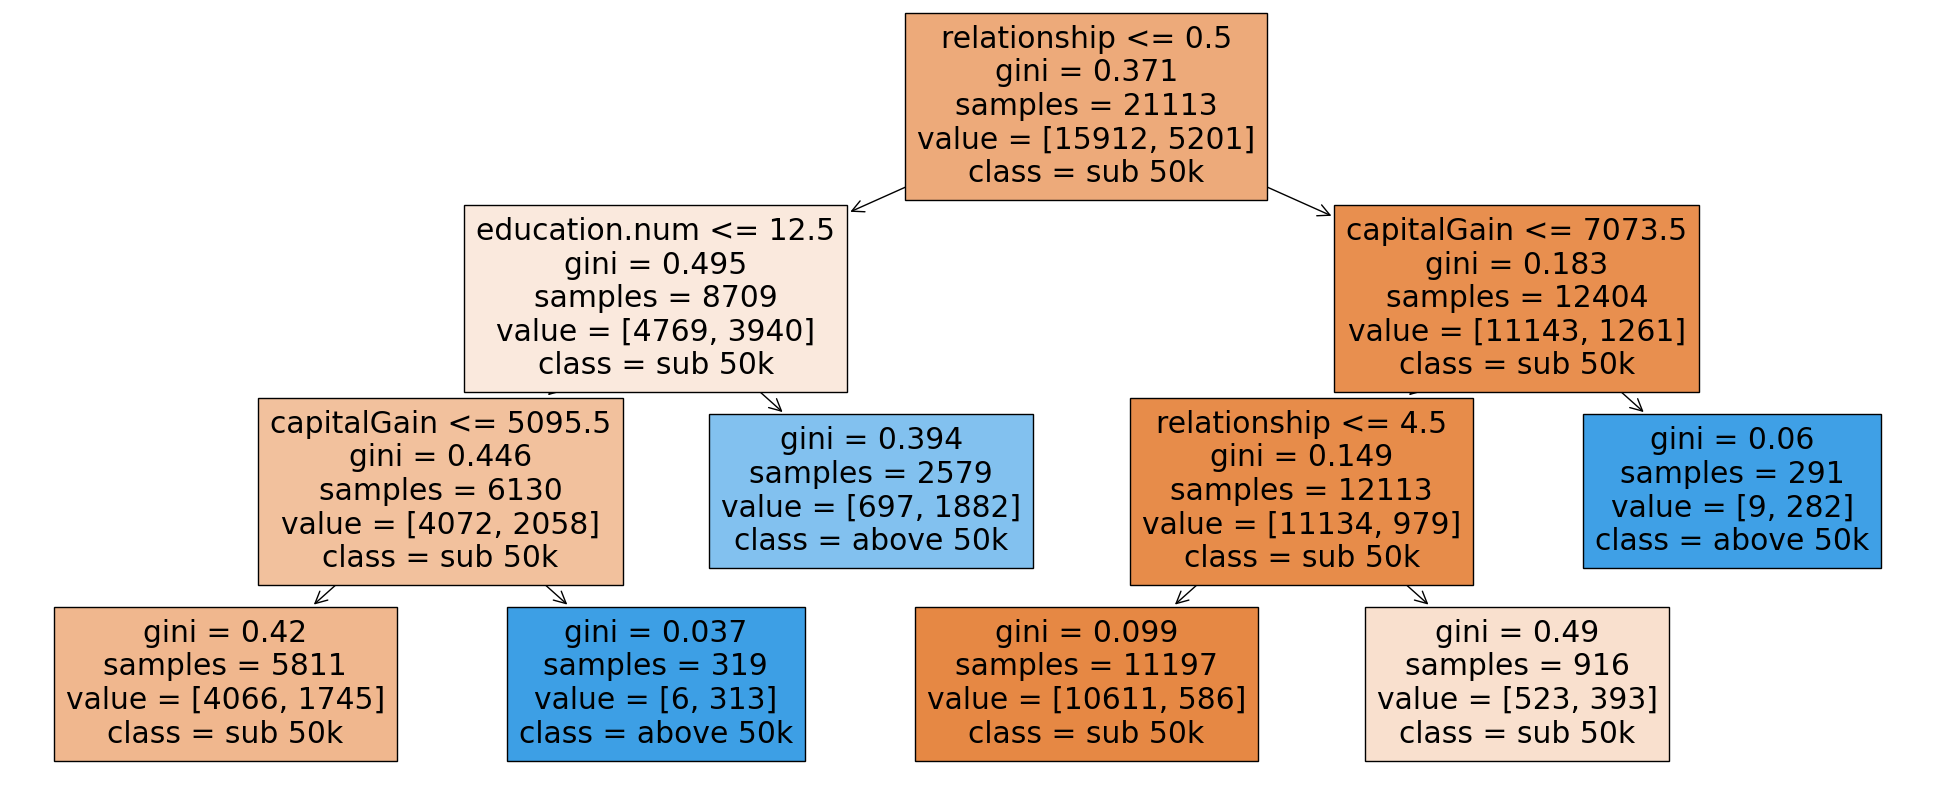

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

###---plotting tree---
plt.figure(figsize=(25,10))

plot_tree(final_model,filled=True, feature_names=data.columns, class_names=['sub 50k', 'above 50k'])
plt.show()

In [ ]:
from sklearn.tree import export_text
print(export_text(final_model))